In [196]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np
import qgrid
import beakerx as bx
from datetime import datetime as dtt

from pa_lib.file import data_files, load_bin, store_bin, store_excel
from pa_lib.df   import calc_col_partitioned, clean_up_categoricals, flatten, replace_col, cond_col, desc_col
from pa_lib.util import obj_size
from pa_lib.log  import time_log
from pa_lib.types import dtFactor

# display long columns completely
pd.set_option('display.max_colwidth', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_files()

,size,mtime
name,,
bd_data.csv.zip,151.6 MB,25.04.19 10:14:28
bd_data.feather,184.5 MB,25.04.19 10:14:34
bd_data_raw.feather,327.1 MB,25.04.19 10:14:28
bd_data_vkprog.feather,95.7 MB,25.04.19 10:14:38
crm_data.csv.zip,16.8 MB,25.04.19 13:44:19
crm_data.feather,51.5 MB,25.04.19 13:44:19
crm_data_vkprog.feather,42.6 MB,25.04.19 13:44:21
plz_data.csv.zip,36.3 KB,25.04.19 13:46:37
plz_data.feather,135.7 KB,25.04.19 13:46:37


In [4]:
bd = load_bin('bd_data_vkprog.feather')

2019-04-25 14:41:06 [INFO] Reading from file /home/pa/data/bd_data_vkprog.feather
2019-04-25 14:41:06 [INFO] Finished loading binary file in 0.13s (0.3s CPU)


In [6]:
desc_col(bd, True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/743796,26331,2.9 MB,"[100034,654783]"
ENDKUNDE,category,0/743796,24856,4.0 MB,"[""Persönlich"" Verlags AG,ô quai des arts]"
EK_ABC,category,2532/741264,8,727.2 KB,"[nan,NO]"
EK_PLZ,category,155/743641,2982,1.7 MB,"[nan,WC2H OBA 1]"
EK_ORT,category,154/743642,2878,1.7 MB,"[nan,Zürich Mülligen]"
EK_LAND,category,154/743642,55,732.4 KB,"[nan,USA]"
EK_HB_APG_KURZZ,category,36034/707762,83,733.8 KB,"[nan,YIL]"
EK_AKTIV,category,0/743796,2,726.5 KB,"[0,1]"
AGENTUR,category,355900/387896,3300,1.8 MB,"[nan,Österreich Werbung]"
VERKAUFSBERATER,category,0/743796,167,1.4 MB,"[ABB,ZHU]"


#### Filter data: Only from 2014, only non-zero

In [132]:
data = bd.loc[(bd.NETTO > 0) & (bd.KAMP_ERFASS_JAHR > 2014)].pipe(clean_up_categoricals)

#### Set up plotting

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 90
plt.rcParams['figure.figsize'] = [15, 10]

### Plots

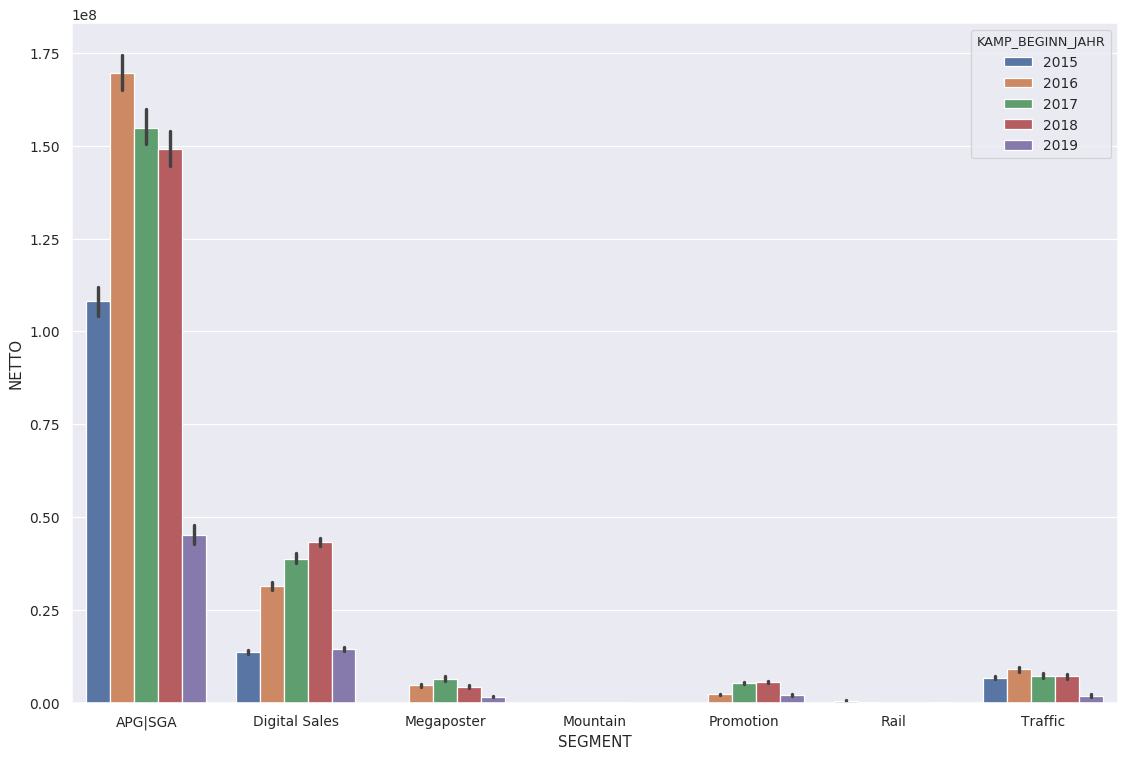

In [133]:
sns.barplot(data=data, x="SEGMENT", y="NETTO", hue='KAMP_BEGINN_JAHR', estimator=np.sum)

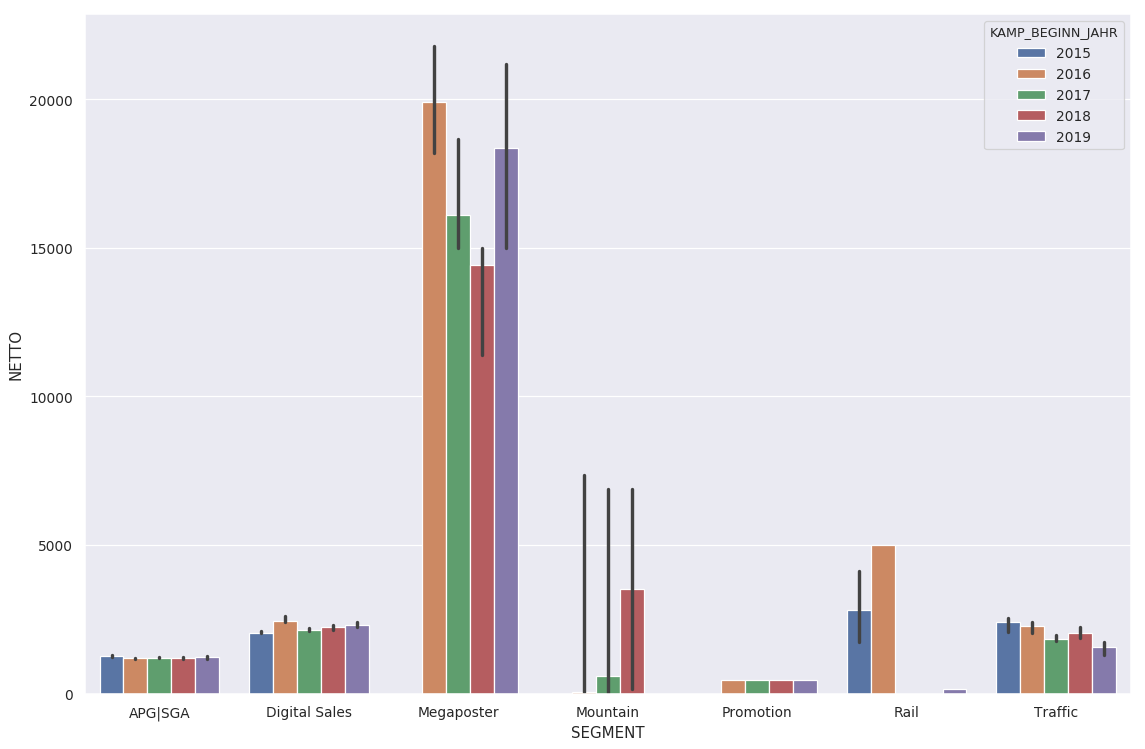

In [134]:
sns.barplot(data=data, x="SEGMENT", y="NETTO", hue='KAMP_BEGINN_JAHR', estimator=np.median)

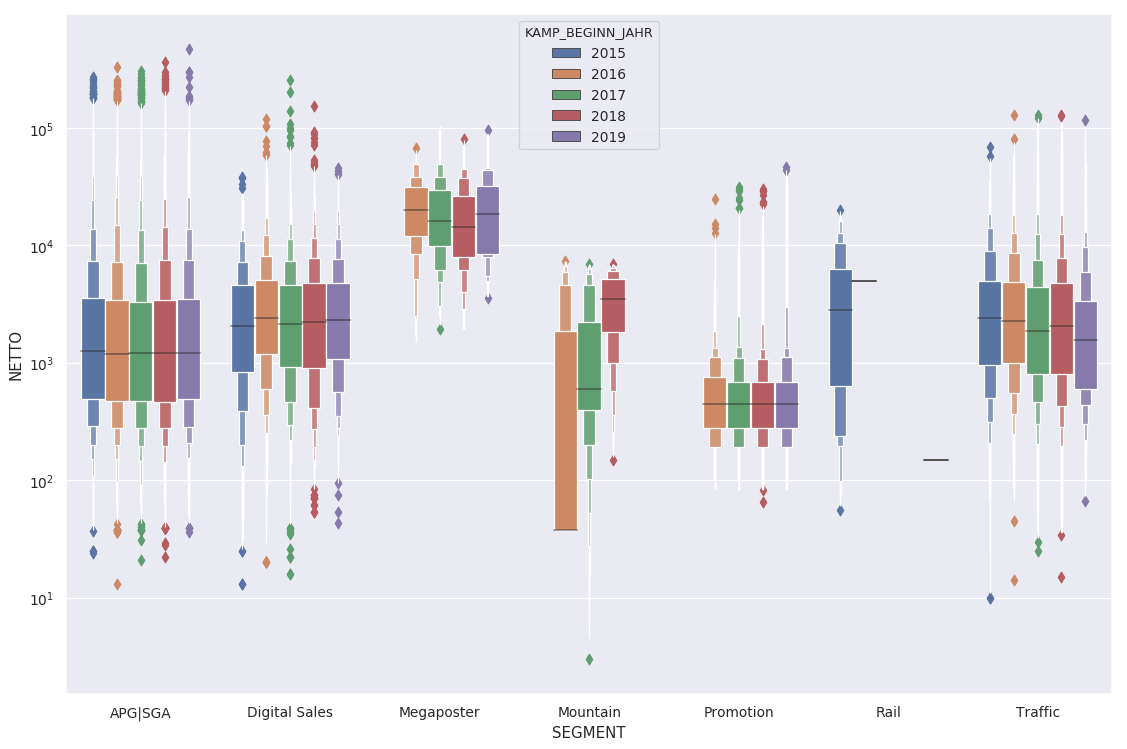

In [135]:
plt.yscale('log')
sns.boxenplot(data=data, x='SEGMENT', y='NETTO', hue='KAMP_BEGINN_JAHR')

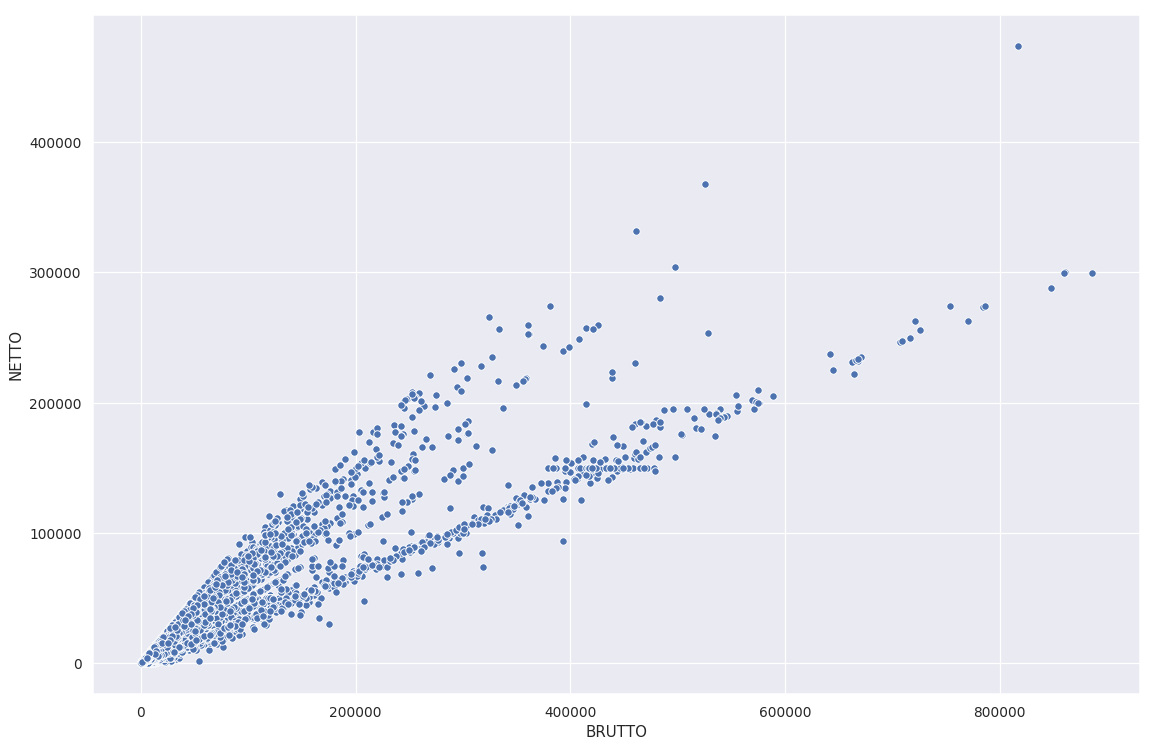

In [136]:
sns.scatterplot(x=data.BRUTTO, y=data.NETTO)

In [137]:
desc_col(data, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/212519,12409,12.4 MB,"[100034,654783]"
ENDKUNDE,category,0/212519,11819,13.3 MB,"[""einfach-luxuriös"",Österreich Werbung Deutschland GmbH]"
EK_ABC,category,0/212519,8,11.8 MB,"[A,NO]"
EK_PLZ,category,12/212507,2029,12.2 MB,"[nan,WC2E 9JL]"
EK_ORT,category,12/212507,1956,12.2 MB,"[nan,Zürich Mülligen]"
EK_LAND,category,12/212507,33,11.8 MB,"[nan,USA]"
EK_HB_APG_KURZZ,category,6673/205846,45,11.8 MB,"[nan,YAM]"
EK_AKTIV,category,0/212519,2,11.8 MB,"[0,1]"
AGENTUR,category,99686/112833,1636,12.2 MB,"[nan,Österreich Werbung]"
VERKAUFSBERATER,category,0/212519,96,11.8 MB,"[ABS,ZHU]"


In [156]:
data.KAMP_ERFASS_JAHR.value_counts(dropna=False)

2017    55410
2016    53428
2018    53272
2015    40574
2019     9835
Name: KAMP_ERFASS_JAHR, dtype: int64

In [158]:
data.loc[data.KAMP_BEGINN_JAHR.isna()]['KAMP_ERFASS_JAHR'].value_counts()

2019    1268
2018      11
2017       0
2016       0
2015       0
Name: KAMP_ERFASS_JAHR, dtype: int64

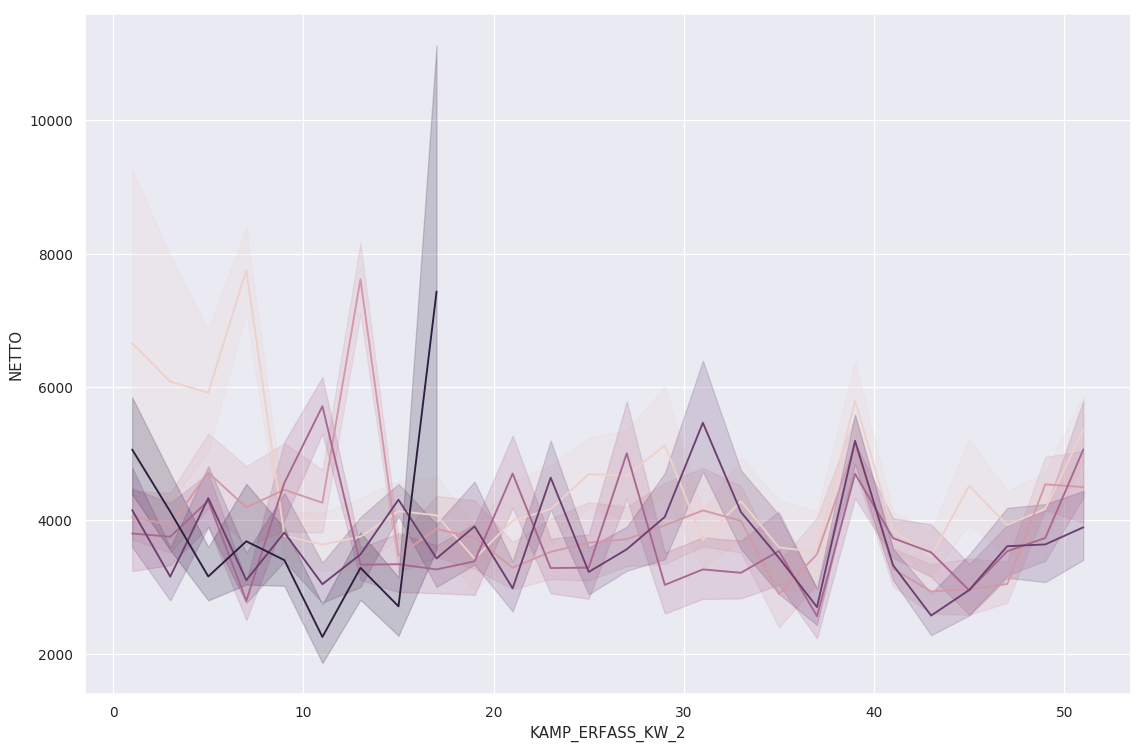

In [149]:
sns.lineplot(x=data.KAMP_ERFASS_KW_2, y=data.NETTO, hue=data.KAMP_ERFASS_JAHR, legend=False)

### Netto Reservation und Aushang per Endkunde und KW2

In [183]:
from concurrent.futures import ProcessPoolExecutor

def sum_calc(param):
    (df, col_year, col_week) = param
    return (df.groupby(['ENDKUNDE_NR', col_year, col_week], observed=False, as_index=False)[['NETTO']].agg('sum'))

with time_log('calculating sums'):
    with ProcessPoolExecutor(max_workers=2) as executor:
        (data_res, data_aus) = tuple(executor.map(sum_calc, [(data, 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'), 
                                                             (data, 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2')]))

    data_by_week = (data_res.merge(data_aus,  
                                   left_on=['ENDKUNDE_NR', 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'], 
                                   right_on=['ENDKUNDE_NR', 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], 
                                   how='outer', suffixes=('_res', '_aus'))
                            .rename({'KAMP_ERFASS_JAHR': 'Jahr', 'KAMP_ERFASS_KW_2': 'Kw', 'NETTO_res': 'Res', 'NETTO_aus': 'Aus'}, 
                                    axis='columns'))

    data_by_week = (data_by_week.fillna({'Jahr': data_by_week.KAMP_BEGINN_JAHR, 'Kw': data_by_week.KAMP_BEGINN_KW_2, 'Res': 0, 'Aus': 0})
                                .drop(['KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], axis='columns')
                                .sort_values(['Jahr', 'ENDKUNDE_NR', 'Kw'])
                                .reset_index(drop=True))

store_bin(data_by_week, 'bd_by_week.feather')

2019-04-30 16:18:15 [INFO] Finished calculating sums in 67.13s (6.98s CPU)
2019-04-30 16:18:15 [INFO] Writing to file /home/pa/data/bd_by_week.feather
2019-04-30 16:18:15 [INFO] Written 30.9 MB
2019-04-30 16:18:15 [INFO] Finished storing binary file in 0.14s (1.02s CPU)


In [164]:
desc_col(data_by_week, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/1613170,12409,3.5 MB,"[100034,654783]"
Jahr,category,0/1613170,5,1.5 MB,"[2015,2019]"
Kw,category,0/1613170,26,1.5 MB,"[1,51]"
Res,float64,0/1613170,17109,12.3 MB,"[0.0,5374729.0]"
Aus,float64,0/1613170,17351,12.3 MB,"[0.0,1636724.0]"


In [225]:
data_non_zero = (data_by_week
                 .query('Res > 0 or Aus > 0')
                 .pipe(clean_up_categoricals))

ek_minmax = (data_non_zero
             .assign(Jahr_Kw = data_non_zero.Jahr.astype('str').str.cat(
                               data_non_zero.Kw.astype('str'), sep='_')
                               .str.replace(r'_(\d)$', r'_0\g<1>') # make Kw two digits for sorting
                               .astype(dtFactor))
             .drop(['Kw', 'Jahr'], axis='columns')
             .groupby('ENDKUNDE_NR')
             .agg(['min', 'max']))

In [226]:
cols = [f'{fld}_{agg}' for (fld, agg) in ek_minmax.columns.to_flat_index()]
ek_minmax.set_axis(labels=cols, axis='columns', inplace=True)

In [223]:
ek_minmax.query('Jahr_min < 2016 and Jahr_max > 2017').shape

(2143, 8)

In [227]:
qgrid.show_grid(ek_minmax)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…